# Imports

In [1]:
!pip install openpyxl

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd

# Main_All_HAnn

merged_whole_with_topic.xlsx is later caller Main_All_HAnn_with_topics.xlsx in the files

In [3]:
df = pd.read_excel('/work/merged_whole_with_topic.xlsx')

In [4]:
sns.set_theme(style="whitegrid")
figsize = (10, 6)
palette = sns.color_palette("BuPu", 2)

In [7]:
bias_cols = [
    "affect_h_bs","availability_h_bs","representativeness_h_bs","confirmation_b_bs","all_or_nothing_bs",
    "affect_h_fs","availability_h_fs","representativeness_h_fs","confirmation_b_fs","all_or_nothing_fs",
    "affect_h_ir","availability_h_ir","representativeness_h_ir","confirmation_b_ir","all_or_nothing_ir",
    "affect_h_wl","availability_h_wl","representativeness_h_wl","confirmation_b_wl","all_or_nothing_wl",
]
df_long = df.melt(
    id_vars=["topic","platform"],
    value_vars=bias_cols,
    var_name="bias_annotator",
    value_name="value"
)

df_long[["bias","annotator"]] = df_long["bias_annotator"].str.rsplit("_", n=1, expand=True)

df1 = df_long[df_long["value"] == 1].copy()

bias_order = [
    "affect_h",
    "availability_h",
    "representativeness_h",
    "confirmation_b",
    "all_or_nothing"
]
full_names = {
    "affect_h": "Affect heuristic",
    "availability_h": "Availability heuristic",
    "representativeness_h": "Representativeness heuristic",
    "confirmation_b": "Confirmation bias",
    "all_or_nothing": "All-or-nothing thinking"
}

df1["bias"] = pd.Categorical(df1["bias"], categories=bias_order, ordered=True)
df1["bias_pretty"] = df1["bias"].map(full_names)

## Reddit

/tmp/ipykernel_70/3463234918.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["bias_pretty", "topic"])["value"]


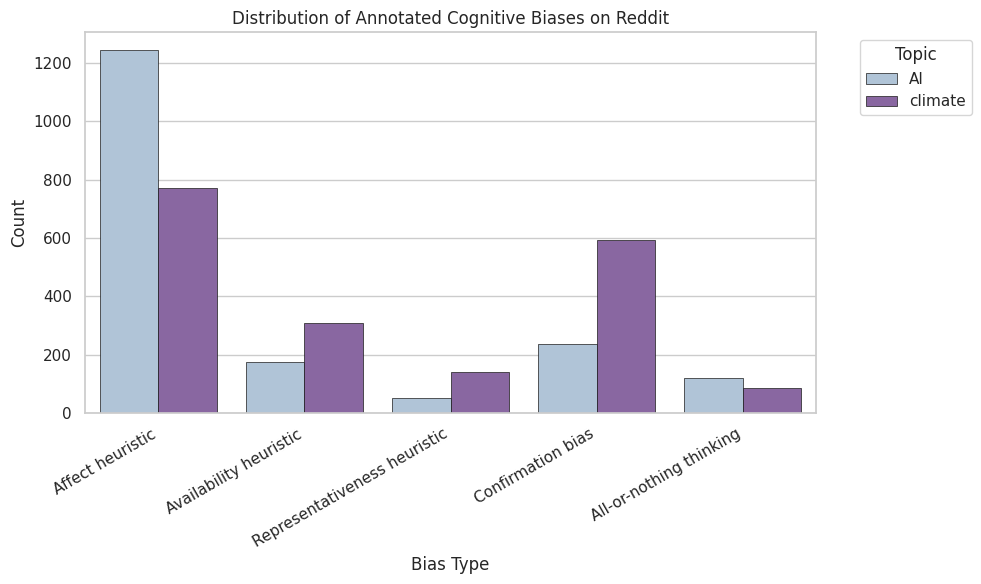

In [28]:
reddit_stats = (
    df1[df1.platform == "Reddit"]
    .groupby(["bias_pretty", "topic"])["value"]
    .count()
    .reset_index(name="count")
)

topic_order = sorted(df1.topic.unique())

plt.figure(figsize=figsize)
sns.barplot(
    data=reddit_stats,
    x="bias_pretty", y="count", hue="topic",
    hue_order=topic_order,
    palette=palette,
    edgecolor="0.1",
    linewidth=0.5         
)
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.title("Distribution of Annotated Cognitive Biases on Reddit")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Topic", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

## Twitter

/tmp/ipykernel_70/3649682696.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["bias_pretty", "topic"])["value"]


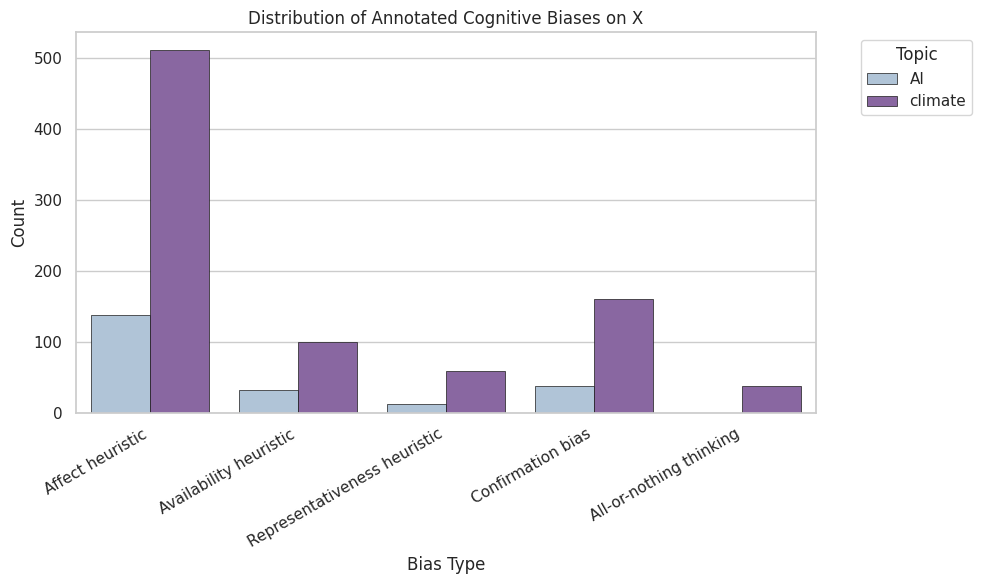

In [31]:
twitter_stats = (
    df1[df1.platform == "Twitter"]
    .groupby(["bias_pretty", "topic"])["value"]
    .count()
    .reset_index(name="count")
)

topic_order = sorted(df1.topic.unique())  # e.g. ["AI", "Climate"]

plt.figure(figsize=figsize)
sns.barplot(
    data=twitter_stats,
    x="bias_pretty", y="count", hue="topic",
    hue_order=topic_order,
    palette=palette,
    edgecolor="0.1",
    linewidth=0.5
)
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.title("Distribution of Annotated Cognitive Biases on X")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Topic", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# Main_Agree_All_HAnn

agreement_df_r2.xlsx is later called Main_Agree_All_HAnn.xlxs in the files.

In [5]:
df2 = pd.read_excel('/work/agreement_df_r2.xlsx')

In [15]:
bias_cols = [
    "affect_h_bs","availability_h_bs","representativeness_h_bs","confirmation_b_bs","all_or_nothing_bs",
    "affect_h_fs","availability_h_fs","representativeness_h_fs","confirmation_b_fs","all_or_nothing_fs",
    "affect_h_ir","availability_h_ir","representativeness_h_ir","confirmation_b_ir","all_or_nothing_ir",
    "affect_h_wl","availability_h_wl","representativeness_h_wl","confirmation_b_wl","all_or_nothing_wl",
]
df2_long = df2.melt(
    id_vars=["topic","platform"],
    value_vars=bias_cols,
    var_name="bias_annotator",
    value_name="value"
)

df2_long[["bias","annotator"]] = df2_long["bias_annotator"].str.rsplit("_", n=1, expand=True)
df2_pos = df2_long[df2_long["value"] == 1].copy()

bias_order = [
    "affect_h",
    "availability_h",
    "representativeness_h",
    "confirmation_b",
    "all_or_nothing"
]
full_names = {
    "affect_h": "Affect heuristic",
    "availability_h": "Availability heuristic",
    "representativeness_h": "Representativeness heuristic",
    "confirmation_b": "Confirmation bias",
    "all_or_nothing": "All-or-nothing thinking"
}
df2_pos["bias"] = pd.Categorical(df2_pos["bias"], categories=bias_order, ordered=True)
df2_pos["bias_pretty"] = df2_pos["bias"].map(full_names)

## Reddit

In [18]:
sns.set_theme(style="whitegrid")
figsize = (10,6)
cmap_full = cm.get_cmap("PuBu")

palette_light = [cmap_full(0.25), cmap_full(0.60)]
palette_light = [tuple(c[:3]) for c in palette_light]

topic_order = sorted(df2_pos.topic.unique())

/tmp/ipykernel_70/3264397502.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["bias_pretty","topic"])["value"]


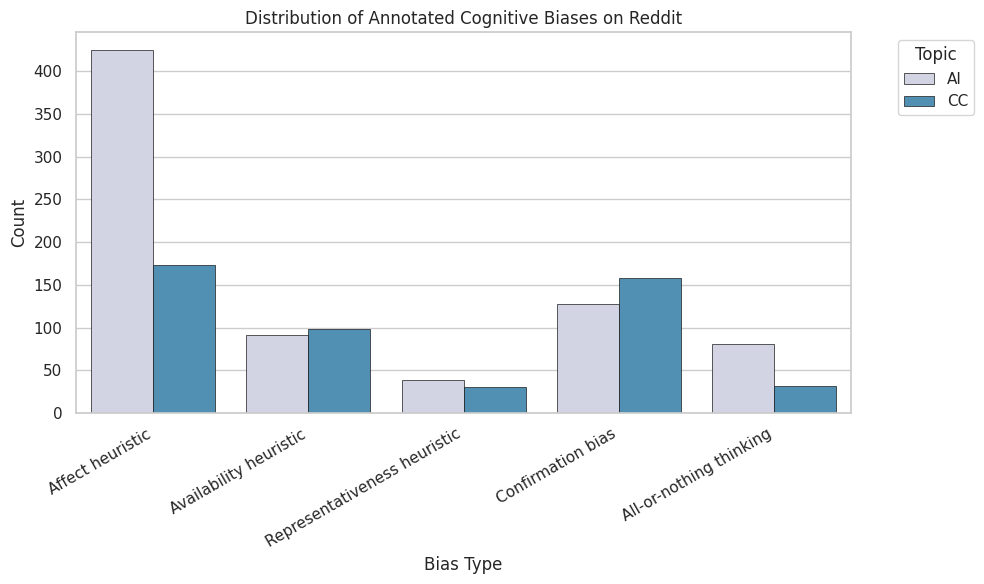

In [186]:
reddit_stats2 = (
    df2_pos[df2_pos.platform == "Reddit"]
    .groupby(["bias_pretty","topic"])["value"]
    .count()
    .reset_index(name="count")
)

plt.figure(figsize=figsize)
sns.barplot(
    data=reddit_stats2,
    x="bias_pretty", y="count", hue="topic",
    hue_order=topic_order,
    palette=palette_light,
    edgecolor="0.1",
    linewidth=0.5
)
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.title("Distribution of Annotated Cognitive Biases on Reddit")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Topic", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

## Twitter

/tmp/ipykernel_70/256823384.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["bias_pretty","topic"])["value"]


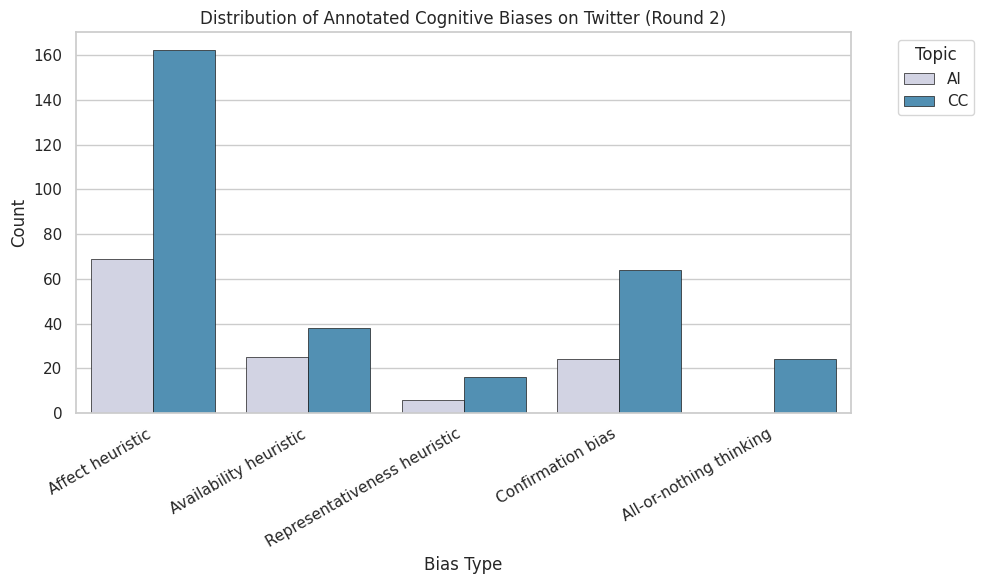

In [189]:
twitter_stats2 = (
    df2_pos[df2_pos.platform == "Twitter"]
    .groupby(["bias_pretty","topic"])["value"]
    .count()
    .reset_index(name="count")
)

plt.figure(figsize=figsize)
sns.barplot(
    data=twitter_stats2,
    x="bias_pretty", y="count", hue="topic",
    hue_order=topic_order,
    palette=palette_light,
    edgecolor="0.1",
    linewidth=0.5
)
plt.xlabel("Bias Type")
plt.ylabel("Count")
plt.title("Distribution of Annotated Cognitive Biases on Twitter (Round 2)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Topic", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


## Graphs per annotator

In [9]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches

/tmp/ipykernel_122/3351134119.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["annotator","bias_pretty","topic"])["value"]


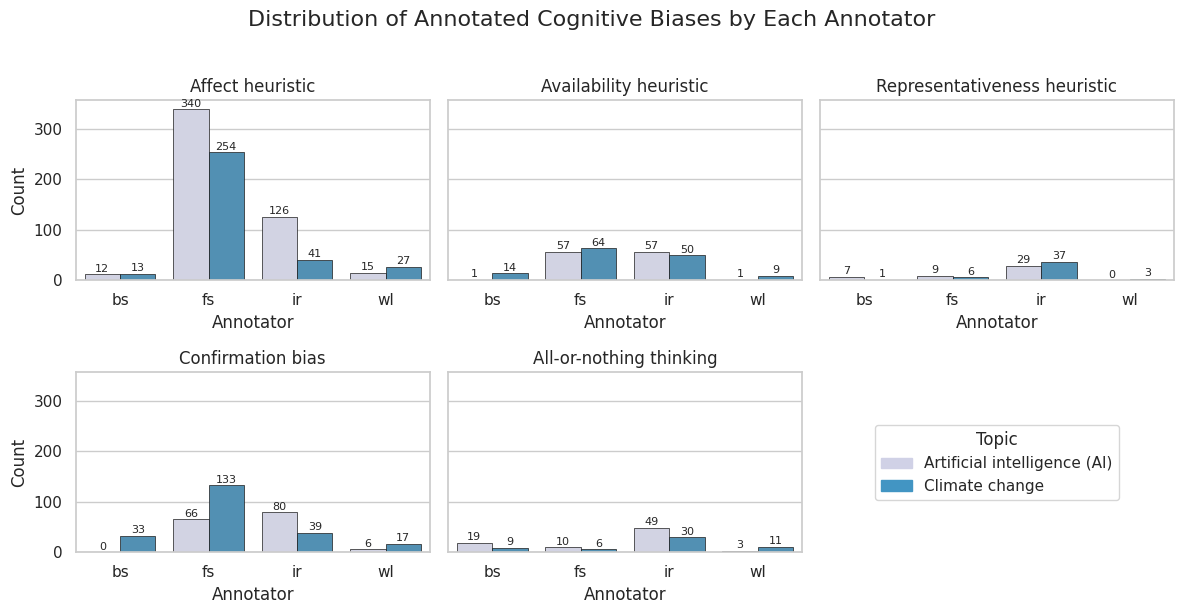

In [24]:
annotators = ["bs","fs","ir","wl"]
bias_list = [
    "Affect heuristic",
    "Availability heuristic",
    "Representativeness heuristic",
    "Confirmation bias",
    "All-or-nothing thinking"
]

bias_stats = (
    df2_pos
    .groupby(["annotator","bias_pretty","topic"])["value"]
    .count()
    .reset_index(name="count")
)
bias_stats = bias_stats[bias_stats["bias_pretty"].isin(bias_list)]

fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharey=True)
axes = axes.flatten()


for i, bias in enumerate(bias_list):
    ax = axes[i]
    data = bias_stats[bias_stats["bias_pretty"] == bias]
    sns.barplot(
        data=data,
        x="annotator", y="count", hue="topic",
        order=annotators,
        palette=palette_light,
        edgecolor="0.1", linewidth=0.5,
        ax=ax,
        legend=False       
    )
    ax.set_title(bias)
    ax.set_xlabel("Annotator")
    if i % 3 == 0:
        ax.set_ylabel("Count")
    else:
        ax.set_ylabel("")
    ax.set_xticks(range(len(annotators)))
    ax.set_xticklabels(annotators)

    for p in ax.patches:
        h = p.get_height()
        ax.text(
            p.get_x() + p.get_width()/2, h + 0.5,
            f"{int(h)}", ha="center", va="bottom", fontsize=8
        )

ax_leg = axes[5]

topics = sorted(bias_stats.topic.unique()) 
label_map = {
    "AI": "Artificial intelligence (AI)",
    "CC": "Climate change"
}

handles = []
labels = []
for i, topic in enumerate(topics):
    handles.append(mpatches.Patch(color=palette_light[i]))
    labels.append(label_map[topic])

ax_leg.legend(handles, labels, title="Topic", loc="center")
ax_leg.axis("off")


fig.suptitle(
    "Distribution of Annotated Cognitive Biases by Each Annotator",
    fontsize=16,
    y=1.02
)

plt.tight_layout()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57b17465-b515-43be-9dff-cc539004fde2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>